<a href="https://colab.research.google.com/github/LucasAp-DEV/Trabalhocolab/blob/main/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Desafio do Titanic**

Nesta analise esta disponivel alguns dados sobre o naufrágio do RMS Titanic que ocorreu entre a noite de 14 de abril e a madrugada de 15 de abril de 1912, no Atlântico Norte, quatro dias após o início de sua viagem inaugural
iniciada em Southampton, na Inglaterra, com destino à cidade de Nova Iorque, nos Estados Unidos.

Serão apresentados principalmente dados dos sobreviventes do acidente, como idade, sexo e classe socieconomica.

Foi avaliado também se a premissa que sempre é dita sobre "salvar crianças e mulheres primeiro" se mostrou foi verdadeira para esse naufrágio.


**Conteúdo dos dados**

**Passengerird**: Identificador único para cada passageiro;

**Survived**: Indica se o passageiro sobreviveu, onde (0-Não; 1-Sim)

**Pclass**: Classe do passageiro (1 - Primeira Classe; 2- Segunda Classe; 3-
Terceira Classe;

**Name**: Nome do passageiro;

**Sex**: Sexo do passageiro;

**Age**: Idade do passageiro;

**SibSp**: Número de irmãos - esposas a bordo;

**Parch**: Numero de pais-filhos a bordo;

**Ticket**: Número da passagem;

**Fare**: Preço da passagem;

**Cabin**: Cabine;

**Embarked**: Local onde o passageiro embarcou (C=Cherbourg, Q= Queenstown, S= Southampton)

In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [4]:
train_data = pd.read_csv('train-1.csv')
test_data = pd.read_csv('test.csv')
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


**Grafico em relacão de sobreviventes por idade.**

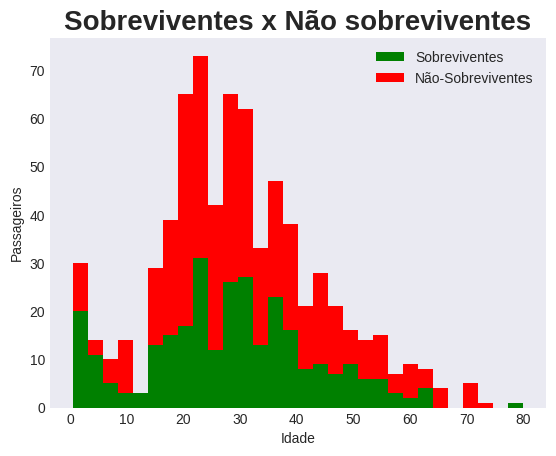

In [64]:
plt.hist([train_data[train_data['Survived']==1]['Age'], train_data[train_data['Survived']==0]['Age']],
         stacked=True, color=['g','r'],
         bins=30, label=['Sobreviventes','Não-Sobreviventes'])
plt.xlabel('Idade')
plt.ylabel('Passageiros')
plt.title('Sobreviventes x Não sobreviventes', fontsize=20, fontweight='bold')
plt.legend();

Grafico de analise de sobreviventes divido por sexo. e podemos identificar que a primeira tomada de decisão no momento do ocorrido foi dar a prioridade para mulheres e crianças.



**Grafico de sobreviventes em relacão a classe**

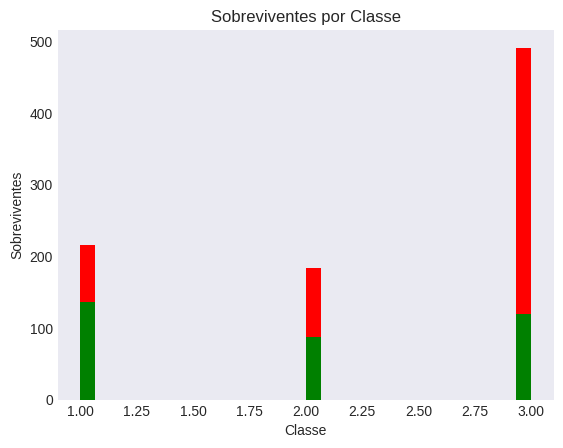

In [65]:
plt.hist([train_data[train_data['Survived']==1]['Pclass'], train_data[train_data['Survived']==0]['Pclass']],
         stacked=True, color=['g','r'],
         bins=30, label=['Sobreviventes','Não-Sobreviventes'])
plt.xlabel('Classe')
plt.ylabel('Sobreviventes')
plt.title('Sobreviventes por Classe')
plt.show()

Neste grafico podemos analisar que a maioria dos sobreviventes foram de pessoas da primeira classe. e a maior quantidade de pessoas que não sobreviveram foram exatamento da 3 classe "Sendo colocada como classe pobre"


**Taxa de sobrevivencia por Classe Economica**

In [66]:
survival_by_class = train_data.groupby('Pclass')['Survived'].mean()
survival_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

**Quantidade de pessoas por Classe**

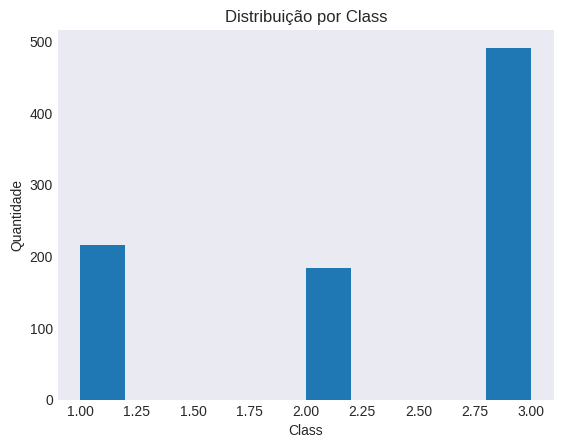

In [67]:
plt.hist(train_data['Pclass'])
plt.xlabel('Class')
plt.ylabel('Quantidade')
plt.title('Distribuição por Class')
plt.show()

O grafico demonstra a quantidade de pessoas por classe, e demonstra a enorme diferença de numero de pessoas entre a 1° e 3° classe, e como ja analisado a quantidade de sobreviventes no incidente foram pessoas da 1° classe, isso demonstra que no momento do ocorrido foi data preferencia para pessoas com nivel de classe social.

**Taxa de sobrevivência por sexo e classe socioeconômica**

In [68]:
survival_by_sex_class = train_data.groupby(['Sex', 'Pclass'])['Survived'].mean()
survival_by_sex_class

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

Como podemos analisar a taxa de sobreviventes é considerada praticamente desproporcional se comparado a 1° e 3° classe, porém a regra de priorisar mulheres foi atribuida para todas as classes sociais.


**Média de idades para sobreviventes e não sobreviventes**

In [69]:
media_survived = train_data[train_data['Survived'] == 1]['Age'].mean()
media_not_survived = train_data[train_data['Survived'] == 0]['Age'].mean()
print('Sobreviventes:', media_survived)
print('Não sobreviventes:', media_not_survived)

Sobreviventes: 28.343689655172415
Não sobreviventes: 30.62617924528302


**Variância das tarifas por classe.**

In [70]:
Tarifa_1 = train_data[train_data['Pclass'] == 1]['Fare'].var()
Tarifa_2 = train_data[train_data['Pclass'] == 2]['Fare'].var()
Tarifa_3 = train_data[train_data['Pclass'] == 3]['Fare'].var()
print('Tarifas pagas pela 1° classe:', Tarifa_1)
print('Tarifas pagas pela 2° classe:', Tarifa_2)
print('Tarifas pagas pela 3° classe:', Tarifa_3)

Tarifas pagas pela 1° classe: 6143.4828162400745
Tarifas pagas pela 2° classe: 180.0265893815179
Tarifas pagas pela 3° classe: 138.72462200862753


**Porcentagem de sobreviventes por classe socioeconômica**

In [71]:
porcentagem_sobreviventes_class = train_data.groupby('Pclass')['Survived'].mean() * 100
porcentagem_sobreviventes_class

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Neste estudo podemos destacar novamente a diferença entre classes no incidente, onde leva a mais uma afirmação da prioridade que foi dada para as pessoas de mais alto nivel socioeconomico.


<ipython-input-72-21351f9af453>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


<Axes: xlabel='Embarked', ylabel='Survived'>

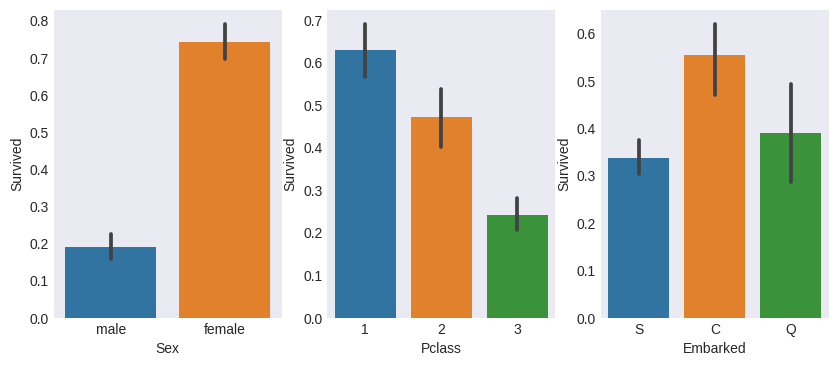

In [72]:
plt.style.use('seaborn-dark')

fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(10,4))

sns.barplot(x='Sex', y= 'Survived', data=train_data, ax=axis1)
sns.barplot(x='Pclass', y= 'Survived', data=train_data, ax=axis2)
sns.barplot(x='Embarked', y= 'Survived', data=train_data, ax=axis3)

Text(0.5, 1.0, 'Sobreviventes por Preço do Ticket')

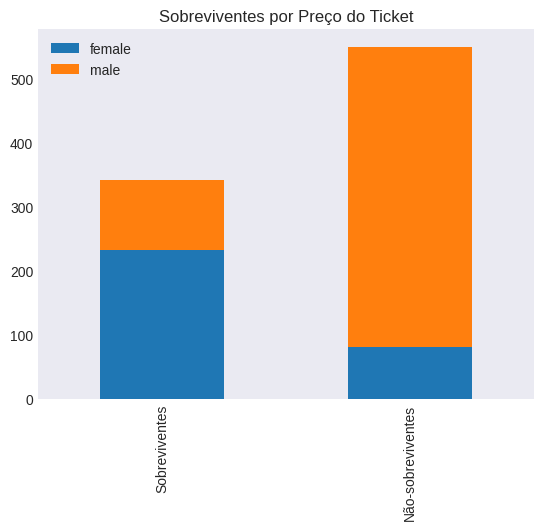

In [73]:
survived_sex = train_data[train_data['Survived']==1]['Sex'].value_counts()
dead_sex = train_data[train_data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Sobreviventes','Não-sobreviventes']
df.plot(kind='bar',stacked=True);
plt.title('Sobreviventes por Preço do Ticket')

* Podemos confirmar que as mulheres tiveram mais chance de sobreviver que os homens (75% a 18%)

* Os passageiros que embarcaram na primeira classe tiveram mais de 60% de chance de sobreviver versus a terceira classe que teve um pouco mais de 20% de sobreviver.

**Conclusão sobre sobreviventes**

Como analisado pelos dados, A quantidade de sobreviventes e chance de sobrevivencia foi dada prioridade para mulheres e crianças, principalmente da primeira classe.

**Divisão dos dados em conjuntos de treinamento e teste**

In [74]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Survived', axis=1),train_data['Survived'],test_size=0.2,random_state=42)

**Criação e Treino do modelo de regressão linear**

In [75]:
model = LinearRegression()
features = ['PassengerId', 'Fare']
model.fit(X_train[features], y_train)
predictions = model.predict(X_test[features])


**Coeficientes de regressão**

In [76]:
coefficients = pd.DataFrame({'Variable': features, 'Coefficient': model.coef_})
coefficients

,Variable,Coefficient
0,PassengerId,0.000026
1,Fare,0.002298


**Coeficiente de determinação (R²)**

In [77]:
r2 = r2_score(y_test, predictions)
print('R:', r2)

R: 0.07606807129521043
